<a id="top"></a>
# CIA World Factbook 2020 Clustering Analysis
---

**Project Outline:**

The global divide between rich and poor countries gets wider every year. While some countries enjoy extraordinary wealth, other countries get left behind. One common way to try and reduce this inequality is for NGOs to supply aid to countries which are struggling in key areas such as health, wellbeing, income and other key socioeconomic measures. However, it can be difficult to identify which countries to prioritise. In this analysis, I take the most recent data from the CIA World Factbook and use clustering to identify which countries are most in need of aid.

## Contents
---

**1.  [Overview](#overview)** <br>
**2.  [About the Data](#about_the_data)** <br>
**3.  [Data Reading & Checking](#data_checking)** <br>
**4.  [EDA](#eda)** <br>
**5.  [Data Preprocessing](#data_preprocessing)** <br>
**6.  [Model Building](#model_building)** <br>
**7.  [Cluster Analysis](#cluster_analysis)** <br>
**8.  [Conclusion](#conclusion)** <br>
**9.  [Future Recommendations](#future_recommendations)** <br>

<a id="overview"></a>
## 1. Overview
---

In order to carry out this analysis, I downloaded the latest CIA World Factbook data from an API developed by [Ian Coleman](https://github.com/iancoleman). After extracting the relevant data for the analysis, I then performed some minor cleaning and feature selection. 

Once the data was in Jupyter, I performed some additional cleaning and then conducted a small EDA.
I then scaled the data, reduced the dimensionality using Principal Component Analysis (PCA) and also checked for outliers.  With outliers present, I decided to use K-Medoids to cluster the data rather than K-Means. This is because K-Medoids is much more robust to outliers.

After identifying three distinct clusters, I performed another small EDA to compare the different clusters. I then reduced the number of countries down even further by taking only those countries that fell either below or above the cluster median for specific features i.e. for GDP per capita, I took the countries that fell below the median, whereas for infant mortality rate, I took the countries that fell above the median. Finally, I was left with the following 11 countries which, according to the analysis, appear to be the most in need of aid and should be prioritised when considering strategic attempts to increase the living standards of citizens from around the world and thus reduce global inequality:


| Countries Most in Need of Aid |
| :- |
| Afghanistan |
| Benin |
| Central African Republic |
| Chad |
| The Democratic Republic of Congo |
| Guinea |
| Guinea-Bissau |
| Mali |
| Niger |
| Sierra Leone |
| South Sudan |

<a id="about_the_data"></a>
## 2. About the Data
---

The data used in this analysis is taken from The World Factbook &ndash; a reference resource produced by the Central Intelligence Agency (CIA) of the United States. It provides basic intelligence on the history, people, government, economy, energy, geography, communications, transportation, military, terrorism, and transnational issues for 266 world entities.

Unfortunately, The World Factbook is only available as an HTML file on the CIA webstite, however, an API has been developed by [Ian Coleman](https://github.com/iancoleman) which enables users to obtain the data in a machine-readable format. The API parses the data from the original Factbook HTML file and converts it into a JSON data structure. The API also checks for updates frequently ensuring that there is always access to the most recent data.

Links to the data and API can be found below:

**Source Data (CIA):** https://www.cia.gov/the-world-factbook/

**API & Factbook JSON:** https://github.com/iancoleman/cia_world_factbook_api

<a id="data_checking"></a>
## 3. Data Reading & Checking

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
data = pd.read_csv('data/factbook_selected.csv')

In [3]:
# Check data
data.head()

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,living_with_hiv,hiv_deaths,literacy,gdp_per_capita,unemployment,inflation,adult_obesity,pop_below_poverty
0,Afghanistan,Asia,2.38,36.7,12.7,638.0,104.3,52.8,4.82,11000.0,500.0,43.0,2000.0,23.90,5.0,5.5,54.5
1,Akrotiri,Middle East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,0.28,13.0,7.1,15.0,10.8,79.0,1.53,1400.0,100.0,98.1,12500.0,5.83,2.0,21.7,14.3
3,Algeria,Africa,1.52,20.0,4.4,112.0,17.6,77.5,2.59,22000.0,200.0,81.4,15200.0,11.70,5.6,27.4,23.0
4,American Samoa,Oceania,-1.40,17.8,5.9,NaN,9.9,74.8,2.35,NaN,NaN,NaN,11200.0,29.80,-0.5,NaN,NaN


Below is the complete schema for our data:

| Feature | Description |
| - | :- |
| **country** | Name of country |
| **region** | Region of country |
| **pop_growth** | Population growth rate (average annual % change) |
| **birth_rate** | Births per 1000 population |
| **death_rate** | Deaths per 1000 population |
| **maternal_mort_rate** | Maternal mortality rate (deaths per 100,000 live births) |
| **infant_mort_rate** | Infant mortality rate (deaths per 1000 live births) |
| **life expectancy** | Life expectancy at birth |
| **total_fert_rate** | Total fertility rate (children born per woman) |
| **living_with_hiv** | Total people living with HIV aids |
| **hiv_deaths** | Total deaths from HIV aids |
| **literacy** | Literacy (% of total population) |
| **gdp_per_capita** | GDP per capita (purchasing power parity - USD) |
| **unemployment** | Unemployment rate (%) |
| **inflation** | Inflation rate (%) |
| **adult_obesity** | Adult obesity (% of total population) |
| **pop_below_poverty** | Population below poverty line (%) |

In [4]:
# Check shape
print(f'Countries: {data.shape[0]}')
print(f'Features:  {data.shape[1]}')

Countries: 247
Features:  17


In [5]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             247 non-null    object 
 1   region              247 non-null    object 
 2   pop_growth          237 non-null    float64
 3   birth_rate          229 non-null    float64
 4   death_rate          229 non-null    float64
 5   maternal_mort_rate  184 non-null    float64
 6   infant_mort_rate    228 non-null    float64
 7   life_expectancy     229 non-null    float64
 8   total_fert_rate     228 non-null    float64
 9   living_with_hiv     164 non-null    float64
 10  hiv_deaths          161 non-null    float64
 11  literacy            167 non-null    float64
 12  gdp_per_capita      228 non-null    float64
 13  unemployment        218 non-null    float64
 14  inflation           226 non-null    float64
 15  adult_obesity       192 non-null    float64
 16  pop_belo

In [6]:
# Descriptive statistics
data.describe()

,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,living_with_hiv,hiv_deaths,literacy,gdp_per_capita,unemployment,inflation,adult_obesity,pop_below_poverty
count,237.000000,229.000000,229.000000,184.000000,228.000000,229.000000,228.000000,1.640000e+02,161.000000,167.000000,228.000000,218.000000,226.000000,192.000000,173.000000
mean,0.961688,18.393013,7.573362,163.233696,19.843860,73.857642,2.469430,2.130256e+05,4096.894410,84.977246,23516.666667,10.361376,9.856637,19.880729,27.852601
std,1.182311,9.291731,2.587290,236.058562,19.333227,7.287065,1.177095,6.930355e+05,10553.751835,18.718207,25047.624828,10.462871,73.284764,11.432112,17.655435
min,-6.680000,6.400000,1.600000,2.000000,1.700000,52.800000,0.870000,2.000000e+02,100.000000,19.100000,700.000000,0.100000,-0.900000,2.100000,0.200000
25%,0.240000,11.400000,5.900000,12.750000,5.575000,69.200000,1.710000,4.775000e+03,100.000000,76.600000,5225.000000,3.772500,1.100000,9.350000,15.000000
50%,0.870000,15.400000,7.300000,52.500000,11.450000,75.500000,1.970000,2.450000e+04,500.000000,94.000000,14800.000000,6.900000,2.200000,20.600000,23.000000
75%,1.730000,23.000000,9.100000,201.750000,29.350000,79.200000,2.862500,1.125000e+05,2500.000000,98.400000,34750.000000,11.982500,4.750000,25.625000,36.600000
max,4.250000,47.500000,15.400000,1150.000000,104.300000,89.300000,7.000000,7.500000e+06,72000.000000,100.000000,139100.000000,77.000000,1087.500000,61.000000,82.500000


#### Dealing with Missing Values

To deal with the missing values, we will first identify all of the countries that are missing more than half of the data. For example, there are 15 features (not including `country` or `region`) so we want to see all countries that are missing data for more than 8 features.

In [7]:
# All countries missing more than half of the data
data[data.isnull().sum(axis=1)>8]

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,living_with_hiv,hiv_deaths,literacy,gdp_per_capita,unemployment,inflation,adult_obesity,pop_below_poverty
1,Akrotiri,Middle East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arctic Ocean,Arctic Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Ashmore And Cartier Islands,Southeast Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Christmas Island,Southeast Asia,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Cocos (Keeling) Islands,Southeast Asia,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN
53,Coral Sea Islands,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Dhekelia,Middle East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Holy See (Vatican City),Europe,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Jan Mayen,Arctic Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Navassa Island,Central America and the Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Apart from 'Arctic Ocean', which has been incorrectly listed as a country, we can see that there are 18 countries that are missing data for more than 8 features. It appears that most countries are small island nations. Unfortunately, there is not enough data for these countries for us to include them into our analysis so we will have to drop them. This may be something that can be improved in future releases of the World Factbook.

In [8]:
# Drop all countries missing data for more than 8 features
missing_data = data[data.isnull().sum(axis=1)>8].index
data = data.drop(missing_data)

Now we need to see how much data is missing for each feature. 

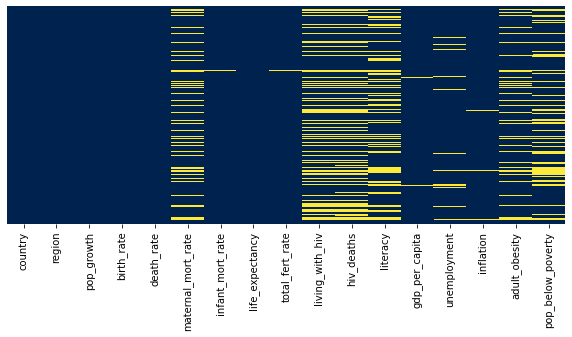

In [9]:
# Visualise missing data for each feature
plt.figure(figsize=(10,4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='cividis');

It looks like some features have quite a bit of missing data. Let's see exactly what percentage of missing data we have for each feature.

In [10]:
# Percentage of nulls for features
round(data.isna().mean()*100,2)

country                0.00
region                 0.00
pop_growth             0.00
birth_rate             0.00
death_rate             0.00
maternal_mort_rate    19.30
infant_mort_rate       0.44
life_expectancy        0.00
total_fert_rate        0.44
living_with_hiv       28.07
hiv_deaths            29.39
literacy              26.75
gdp_per_capita         0.88
unemployment           5.26
inflation              1.32
adult_obesity         16.23
pop_below_poverty     24.12
dtype: float64

We can see that some features have almost a third of the data missing. For this analysis we will remove any features that have more than 20% of missing data.

In [11]:
# Keep only features with less than 20% of data missing
data_final = data.loc[:, data.isna().mean()*100<20].copy()

Removing features with more than 20% of missing data will not only help to keep our data as accurate as possible when we impute the missing data, but it will also prevent us from removing too many features that may contain useful data.

The following features have now been removed: 
* `living_with_hiv`
* `hiv_deaths` 
* `literacy` 
* `pop_below_poverty`

In [12]:
# Check new shape
print(f'Countries: {data_final.shape[0]}')
print(f'Features:  {data_final.shape[1]}')

Countries: 228
Features:  13


In [13]:
# Reset index
data_final = data_final.reset_index(drop=True)

Let's check what regions we have in our data as well as how many countries are in each region.

In [14]:
# Check regions
data_final['region'].value_counts()

Africa                               56
Europe                               46
Central America and the Caribbean    31
Asia                                 22
Oceania                              21
Middle East                          17
Southeast Asia                       14
South America                        13
North America                         5
Arctic Region                         2
AsiaEurope                            1
Name: region, dtype: int64

We can see that we have 'AsiaEurope' as a region which contains one country. We already have Asia and Europe as seperate regions so let's see which country this is and put it into the correct region.

In [15]:
# Check region with only 1 country
data_final[data_final['region']=='AsiaEurope']

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity
212,Ukraine,AsiaEurope,-0.1,9.6,14.0,19.0,7.4,72.9,1.56,8800.0,8.89,14.4,24.1


In [16]:
# Assign Ukraine to correct region (Europe)
data_final.loc[data_final['region']=='AsiaEurope', 'region'] = 'Europe'

#### Distribution of Data

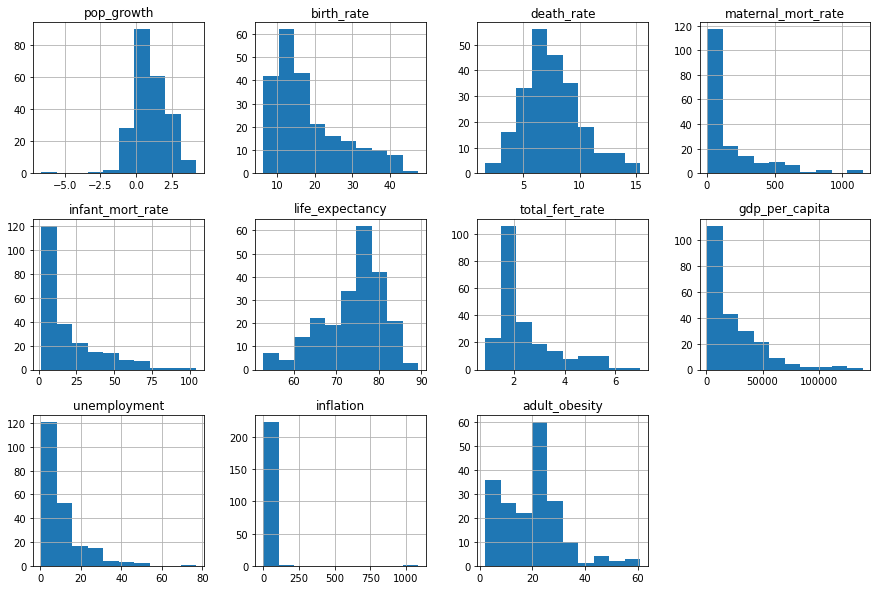

In [17]:
# Distributions
data_final.hist(figsize=(15,10), layout=(3,4));

Here we can see the distributions of each of our features. Below is a few observations:

* `pop_growth` - The majority of countries appear to have positive population growth
* `death_rate` - There appears to be a normal distribution for death rate
* `life_expectancy` - The majority of people appear to live between 70-85 years old
* `adult_obesity` - The distribution for adult obesity appears to be multimodal

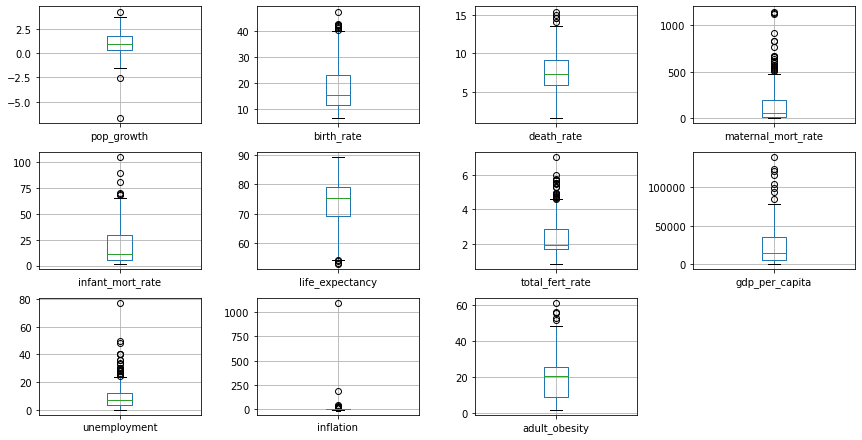

In [18]:
# Boxplots
fig = plt.figure(figsize=(12,8))
features = list(data_final.columns[2:])
for i in range(len(features)):
    fig.add_subplot(4, 4, i+1)
    data_final.boxplot([features[i]])
plt.tight_layout();

We can see from the boxplots that there are outliers for every one of our features. This helps us when deciding how to impute the missing values.

Beacuse of the outliers, we will impute the missing data with median as this method is less influenced by outliers.

In [19]:
# Impute missing data using region median
for feature in data_final.columns[2:]:
    data_final[feature].fillna(data_final.groupby('region')[feature].transform('median'), inplace=True)

In [20]:
# Check to see if all null values have been successfully imputed
print(f'Remaining Missing Values: {data_final.isna().sum().sum()}')

Remaining Missing Values: 0


<a id="eda"></a>
## 4. EDA
---

Now we have dealt with all of the missing values, let's perform a small EDA to visualise some of the features in more detail.

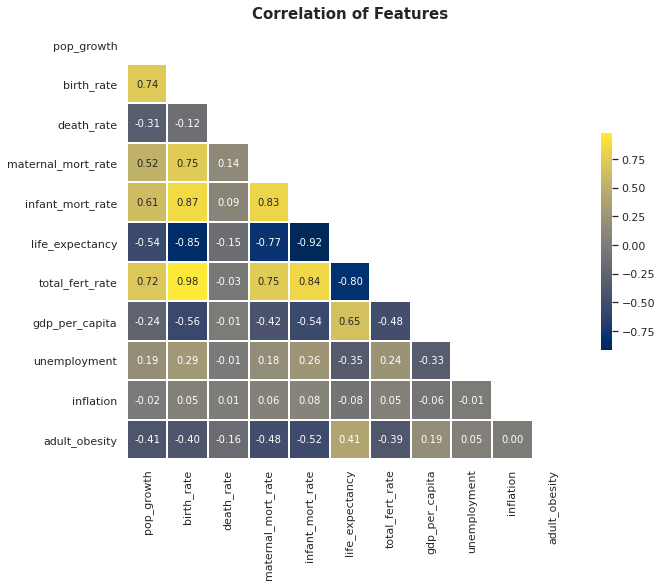

In [21]:
# Correlation of features
data_corr = data_final.corr()
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(data_corr, dtype=bool))
ax.set_title('Correlation of Features', fontweight='bold', fontsize=15)
sns.heatmap(
    data_corr, mask=mask, cmap='cividis', annot=True, fmt='.2f', 
    center=0, linewidths=1, cbar_kws={'shrink': .5}, annot_kws={'size': 10},
);

Here we can see that there are some strong correlations in our data, specifically between measures of births and deaths. For example, `birth_rate` has a near perfect positive correlation with `total_fert_rate` and a strong positive correlation with `infant_mort_rate`. This is due to the fact that as woman have more children (fertility rate), the number of births, and infant deaths, inevitably rise.

`life_expectancy` appears to have a strong negative correlation with `infant_mort_rate`. This could be because life expectancy is measured at birth thus a higher infant mortality rate appears to be associated with lower life expectancy.

`life_expectancy` also appears to have a stong negative correlation with `birth_rates`. This indicates that countries who have higher birth rates also have lower life expectancy.

Now let's have a look at the nature of the correlations between some of the features which are highly correlated with each other.

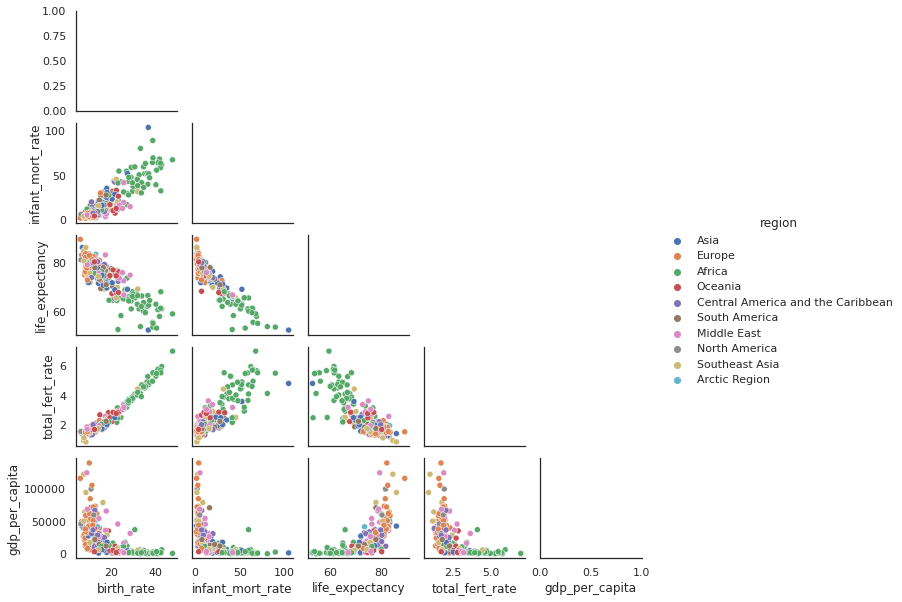

In [22]:
# Pairplot
sns.pairplot(
    data_final[[
        'region',
        'birth_rate', 
        'infant_mort_rate', 
        'life_expectancy', 
        'total_fert_rate', 
        'gdp_per_capita',
    ]], 
    hue='region', diag_kind='None', corner=True, height=1.7, aspect=1.1,
);

We can see from the pairplot that there are linear and curvilinear relationships between the features. It is also immediately apparent that Africa tends to cluster towards the end of all of the pairwise relationships. 

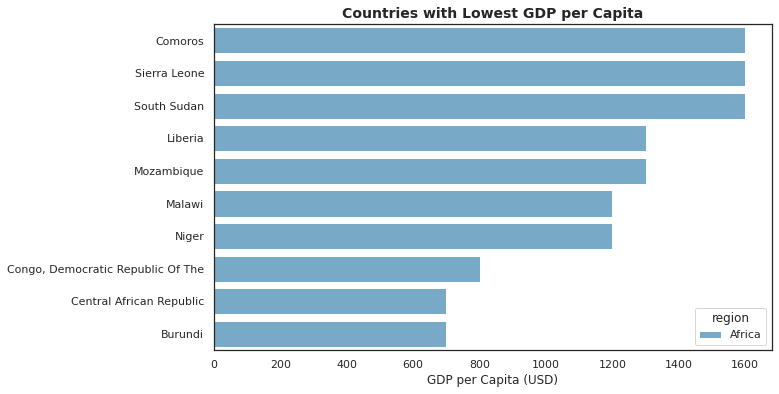

In [23]:
# 10 countries with lowest gdp per capita
gdp_bottom = data_final[[
    'country', 'region', 'gdp_per_capita']].sort_values('gdp_per_capita', ascending=False).tail(10)
plt.figure(figsize=(10,6))
plt.title('Countries with Lowest GDP per Capita', fontweight='bold', fontsize=14)
sns.barplot(x='gdp_per_capita', y='country', data=gdp_bottom, palette='Blues', hue='region')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('');

Here, we can see that the bottom 10 countries in terms of GDP per capita are from the African region.

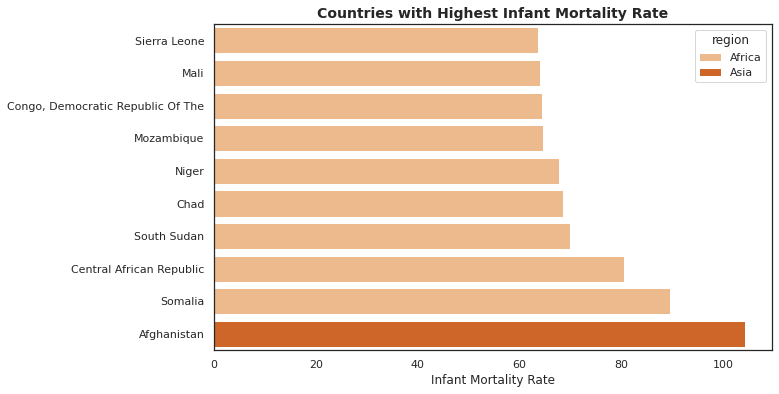

In [24]:
# 10 countries with highest infant mortality rate
infant_mort_bottom = data_final[[
    'country', 'region', 'infant_mort_rate']].sort_values('infant_mort_rate').tail(10)
plt.figure(figsize=(10,6))
plt.title('Countries with Highest Infant Mortality Rate', fontweight='bold', fontsize=14)
sns.barplot(x='infant_mort_rate', y='country', data=infant_mort_bottom, 
            palette='Oranges', hue='region', dodge=False)
plt.xlabel('Infant Mortality Rate')
plt.ylabel('');

Once again, we see many African countries, however it is Afghanistan which has the highest infant mortality rate.

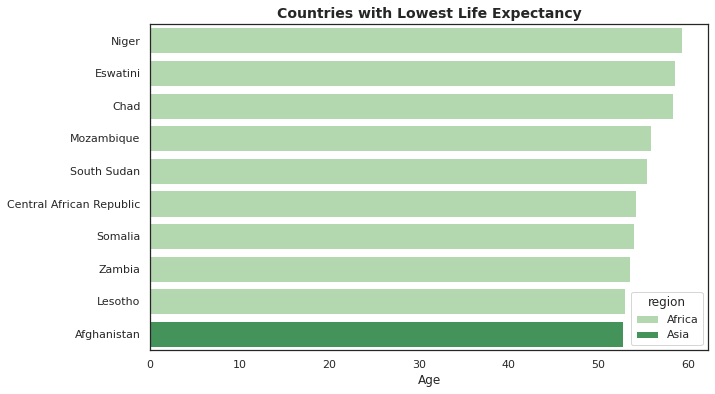

In [25]:
# 10 countries with lowest life expectancy
life_expectancy_bottom = data_final[[
    'country', 'region', 'life_expectancy']].sort_values('life_expectancy', ascending=False).tail(10)
plt.figure(figsize=(10,6))
plt.title('Countries with Lowest Life Expectancy', fontweight='bold', fontsize=14)
sns.barplot(x='life_expectancy', y='country', data=life_expectancy_bottom, 
            palette='Greens', hue='region', dodge=False)
plt.xlabel('Age')
plt.ylabel('');

African countries also have some of the lowest life expectancies, however, Afghanistan again appears to be the worst.

As we can see from the charts above, while Afghanistan has the highest infant mortality rate and lowest life expectancy, African countries tend to have the worst figures overall for each measure. Let's have a look at how the regions compare against each other.

In [26]:
# Compare region medians
data_final.groupby('region').median()

,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity
region,,,,,,,,,,,
Africa,2.295,31.15,7.40,375.0,42.30,64.70,3.985,3300.0,11.500,5.30,8.85
Arctic Region,0.470,13.70,7.80,4.0,5.20,78.35,1.955,47000.0,6.360,1.05,21.90
Asia,0.885,16.20,6.65,32.5,19.90,72.05,1.935,10100.0,4.815,4.60,8.60
Central America and the Caribbean,0.830,14.10,6.30,66.0,9.80,77.30,1.870,17000.0,8.050,1.85,23.40
Europe,0.200,9.60,10.10,6.0,3.70,81.10,1.560,38400.0,5.360,1.70,22.45
Middle East,1.550,17.60,3.40,17.0,11.70,76.20,2.260,31700.0,10.750,1.50,30.40
North America,0.720,11.20,8.30,19.0,5.30,81.00,1.840,48400.0,5.670,1.90,29.40
Oceania,0.610,18.90,5.90,62.0,10.80,74.80,2.350,9800.0,8.800,1.30,46.00
South America,0.860,15.50,6.30,83.5,16.30,76.60,1.915,14400.0,7.220,3.40,22.20


Interestingly, while the African region appears to have the worst figures for almost all measures, Europe appears to have the highest death rate.

Now, let's preprocess our data ready for the model building phase.

<a id="data_preprocessing"></a>
## 5. Data Preprocessing

In [27]:
# Remove non-numerical data
data_num = data_final.drop(columns=['country', 'region'])

#### Scaling

Because we are clustering data points based on the distance between them, we must scale the data.

In [28]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [29]:
# Why are we doing a PCA? What is it and what will it achieve?

#### PCA

We will also perform a Principal Component Analysis (PCA) to reduce the dimensionality of our data. This will help us to remove some of the noise in our data whilst also retaining most of the important information.

Before applying PCA to our final data, we will first need to determine how many components to reduce the features down to. To do this, we need to find out the explained variance for each component.

In [30]:
# Fit PCA to data
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(data_scaled)

PCA(random_state=42, svd_solver='randomized')

In [31]:
# PCA components 
pca.components_

array([[ 0.30872393,  0.40453462,  0.00628588,  0.36025901,  0.40186604,
        -0.3930446 ,  0.39210001, -0.26458959,  0.14303119,  0.02940435,
        -0.22396926],
       [-0.37259145, -0.15246834,  0.80271208,  0.17397434,  0.10414185,
        -0.12932176, -0.09395976, -0.0319738 , -0.16481368,  0.1247312 ,
        -0.28839806],
       [-0.28552507, -0.02223866,  0.11403105, -0.09411949, -0.02309574,
        -0.14887038, -0.0635645 , -0.42573257,  0.65598658,  0.18518633,
         0.47278164],
       [ 0.01013276,  0.02606066, -0.17034247,  0.00717477,  0.01375585,
         0.02230362,  0.02139407,  0.02914634, -0.23171703,  0.95567652,
         0.03385043],
       [ 0.26237546, -0.07862755,  0.13864954,  0.01037221, -0.01946171,
         0.11109361, -0.04702143,  0.57629334,  0.65695474,  0.1754375 ,
        -0.31021304],
       [ 0.04299232,  0.15752811,  0.270899  ,  0.20101543,  0.07097092,
        -0.05400771,  0.28502445,  0.51231722, -0.1366019 , -0.03760109,
         0.698

In [32]:
# Explained Variance Ratio
pca.explained_variance_ratio_

array([0.50552019, 0.11838521, 0.10618199, 0.09088399, 0.05895295,
       0.05175498, 0.02840334, 0.01861257, 0.01536112, 0.00515053,
       0.00079312])

Here, we can see the explained variance for each component. Ideally, we are looking for the number of components that explain over 90% of the variance in our data. We can visualise this better with a Variance Ratio plot.

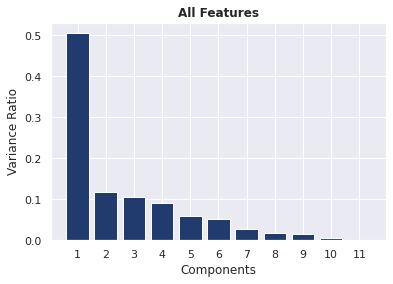

In [33]:
# Variance ratio plot 
sns.set_style('darkgrid')
sns.set_palette('cividis')

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Components")
plt.ylabel("Variance Ratio")
plt.title('All Features', fontweight='bold')
plt.xticks(np.arange(1,len(pca.explained_variance_ratio_)+1,1));

We can see that the first component explains around 50% of the variance while the rest of the components each explain less than 15%.

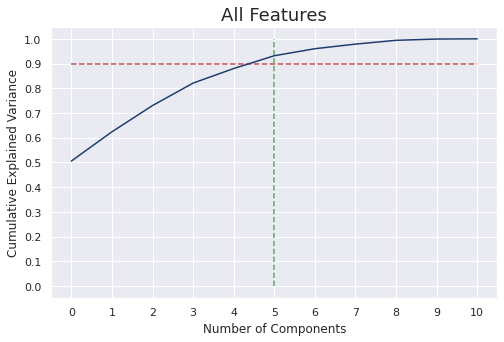

In [34]:
# Scree plot to visualise the cumulative variance
plt.figure(figsize=(8,5))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.90, xmax=len(pca.explained_variance_ratio_)-1, xmin=0, colors="r", linestyles="--")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title('All Features', fontsize=18);

From the scree plot, we can see that 5 components explain over 90% of the variance in our data so we will use 5 components going forward. This helps us to eliminate data that may not be very important.

In [35]:
# Check how well the components explain the features
col_list = list(data_num.columns)
attributes_pca = pd.DataFrame({
    'Attribute':col_list,
    'PC_1':pca.components_[0],
    'PC_2':pca.components_[1],
    'PC_3':pca.components_[2],
    'PC_4':pca.components_[3],
    'PC_5':pca.components_[4],
})
attributes_pca

,Attribute,PC_1,PC_2,PC_3,PC_4,PC_5
0,pop_growth,0.308724,-0.372591,-0.285525,0.010133,0.262375
1,birth_rate,0.404535,-0.152468,-0.022239,0.026061,-0.078628
2,death_rate,0.006286,0.802712,0.114031,-0.170342,0.138650
3,maternal_mort_rate,0.360259,0.173974,-0.094119,0.007175,0.010372
4,infant_mort_rate,0.401866,0.104142,-0.023096,0.013756,-0.019462
5,life_expectancy,-0.393045,-0.129322,-0.148870,0.022304,0.111094
6,total_fert_rate,0.392100,-0.093960,-0.063565,0.021394,-0.047021
7,gdp_per_capita,-0.264590,-0.031974,-0.425733,0.029146,0.576293
8,unemployment,0.143031,-0.164814,0.655987,-0.231717,0.656955
9,inflation,0.029404,0.124731,0.185186,0.955677,0.175437


In [36]:
# Apply PCA with 5 components
pca_n5 = PCA(n_components=5)
df_pca_arr = pca_n5.fit_transform(data_scaled)
df_pca_arr

array([[ 6.37914482,  2.07834003,  0.43482652, -0.66006083,  0.71993179],
       [-1.3944637 ,  0.04622358,  0.09668909, -0.01054179, -0.61882599],
       [-0.093037  , -1.47684965,  0.1641513 ,  0.15420614, -0.32268231],
       ...,
       [ 2.22745766, -0.98757272,  1.03217901, -0.04917199,  0.6195255 ],
       [ 4.94431114,  0.92599404, -0.05124682, -0.37317167,  0.16136919],
       [ 3.07275667,  0.5353626 ,  0.02444872, -0.23215103, -0.39022857]])

In [37]:
# Create new dataframe with components
df_pca = pd.DataFrame(df_pca_arr, columns=["PC_1", "PC_2", "PC_3", "PC_4", "PC_5"])
df_pca_final = pd.concat([data_final[['country','region']], df_pca], axis=1)
df_pca_final.head()

,country,region,PC_1,PC_2,PC_3,PC_4,PC_5
0,Afghanistan,Asia,6.379145,2.078340,0.434827,-0.660061,0.719932
1,Albania,Europe,-1.394464,0.046224,0.096689,-0.010542,-0.618826
2,Algeria,Africa,-0.093037,-1.476850,0.164151,0.154206,-0.322682
3,American Samoa,Oceania,-1.194585,-0.843450,3.028616,-0.436475,-0.342668
4,Andorra,Europe,-2.664176,0.210654,-0.464647,0.000768,0.073787


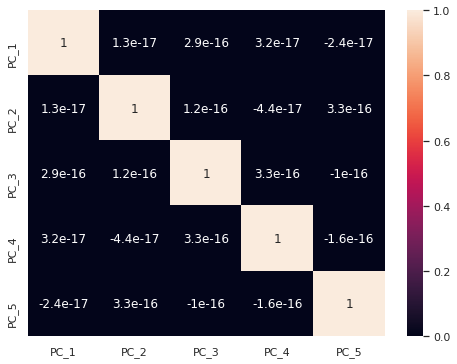

In [38]:
# Heatmap with PCs
plt.figure(figsize=(8,6))        
ax = sns.heatmap(df_pca_final.corr(), annot=True)

Here we can see that there is no correlation between any of our principal components which is good.

Now that we have our components, let's check to see if we have any outliers present in our data.

#### Outlier Analysis

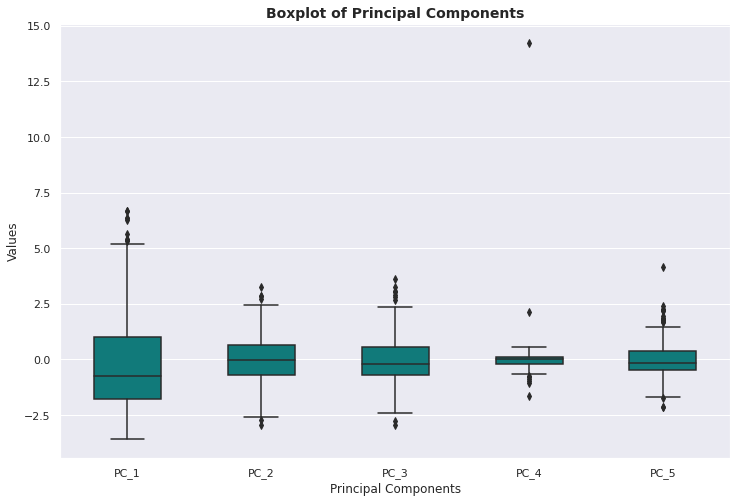

In [39]:
# Outlier analysis 
components = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']
plt.figure(figsize=(12,8))
sns.boxplot(data=df_pca_final[components], width=0.5, color='darkcyan')
plt.title("Boxplot of Principal Components", fontsize=14, fontweight='bold')
plt.ylabel("Values")
plt.xlabel("Principal Components");

It looks like we do have quite a few outliers. Unfortunately, removing outliers here is not an option as the countries we are hoping to identify as needing aid may be the countries that are the outliers.

While K-means is a popular clustering algorithm, it is sensitive to outliers and therefore it is not the best option in this case. Because we cannot afford to lose any data, we will have to opt for an algorithm that is more robust to outliers. Fortunately, we can use the K-Medoids algorithm from the scikit-learn extra library. K-Medoids is more robust to noise and outliers as it will choose one of the cluster members as the medoid while K-Means will move the centre of the cluster towards the outlier which might in turn move other points away from the cluster centre.

#### Hopkins Statistic

To finish off the data preprocessing phase, we will use the Hopkins Statistic to get an idea of how well our data will cluster.

*The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.*

**Source:** [Wikipedia](https://en.wikipedia.org/wiki/Hopkins_statistic)

In [40]:
# Imports
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [41]:
# Hopkins Statistic function
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        HS = 0
 
    return HS

In [42]:
# Calculating Hopkins Statistic
print(f"Hopkins Statistic: {round(hopkins(df_pca_final.drop(['country', 'region'], axis=1)),2)}")

Hopkins Statistic: 0.92


As we can see, the score is close to 1 indicating that the data we have has a high tendency to cluster. This is good and we can be confident going forward into the model building phase.

<a id="model_building"></a>
## 6. Model Building

In [43]:
# Drop non-numerical columns
df_model = df_pca_final.drop(['country', 'region'], axis=1)

In [44]:
# Check data
df_model.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
0,6.379145,2.078340,0.434827,-0.660061,0.719932
1,-1.394464,0.046224,0.096689,-0.010542,-0.618826
2,-0.093037,-1.476850,0.164151,0.154206,-0.322682
3,-1.194585,-0.843450,3.028616,-0.436475,-0.342668
4,-2.664176,0.210654,-0.464647,0.000768,0.073787


### K-Medoids

K-Medoids is a variant of the K-Means algorithm, however, while K-Means tries to minimise the **within cluster sum-of-squares**, K-Medoids tries to minimise the **sum of distances** between each point and the medoid of its cluster. The medoid is also an actual data point (unlike the centroid) which has the least total distance to the other members of its cluster.

Before we continue, we must first find the optimum number of clusters to use in partitioning our data. To do this we can use various methods. Here we will use the elbow method and also a silhouette analysis so that we can be confident in the number of clusters we choose.

In [45]:
# Import relevant libraries
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn_extra.cluster import KMedoids

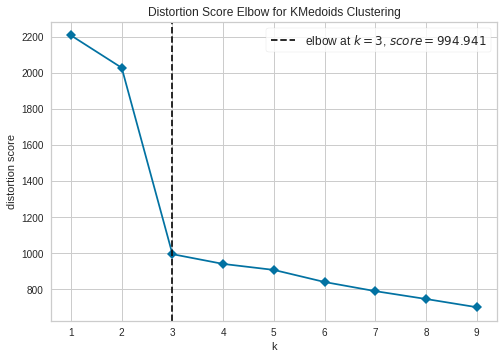

In [46]:
# Finding the optimum number of clusters for k-medoids using elbow method
kmed = KMedoids(n_clusters=i, random_state=42)
visualizer = KElbowVisualizer(kmed, k=(1,10), timings=False)
visualizer.fit(df_model)
visualizer.show();

Using the Yellowbrick library, we can clearly see that the optimum number of clusters is 3. This is the point at which the line forms an elbow.

To be sure, we will also run a silhouette analysis using the same library.

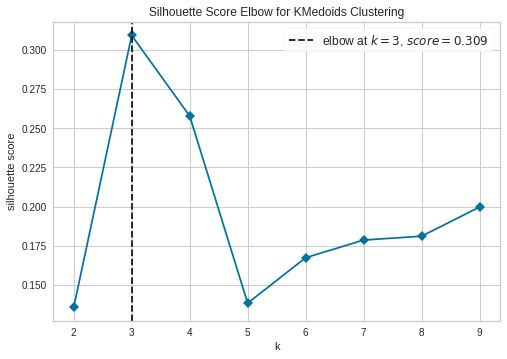

In [47]:
# Instantiate the clustering model and visualizer for silhouette
kmed = KMedoids(n_clusters=i, random_state=42)
visualizer = KElbowVisualizer(kmed, k=(2,10), metric='silhouette', timings=False)
visualizer.fit(df_model)
visualizer.show();

Again, the chart shows us that the optimum number of clusters is 3.

We will also run a more extensive silhouette analysis. This will allow us to see more information for each number of clusters.

The following code was taken from an example on the scikit-learn website. While it was originally used for K-Means, it can easily be adapted for K-Medoids.

**Original Example**: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html*

For n_clusters = 2, The average silhouette_score is: 0.13575772963645072
For n_clusters = 3, The average silhouette_score is: 0.30916080139392293
For n_clusters = 4, The average silhouette_score is: 0.25774500894161334
For n_clusters = 5, The average silhouette_score is: 0.13833978042254585


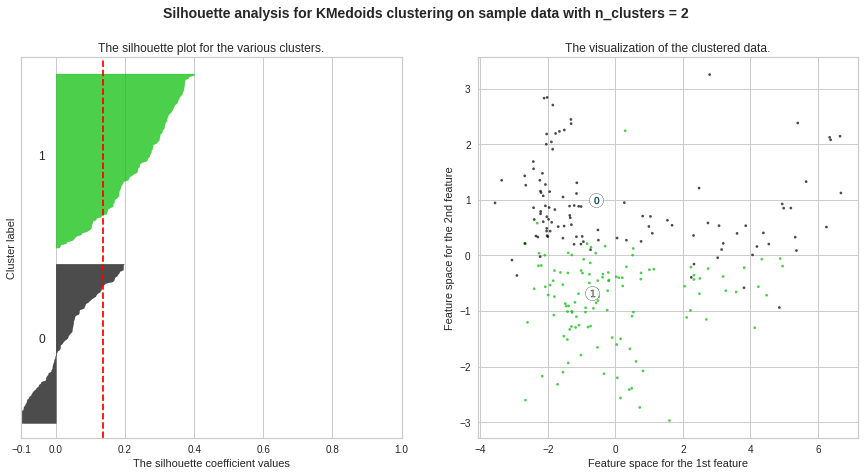

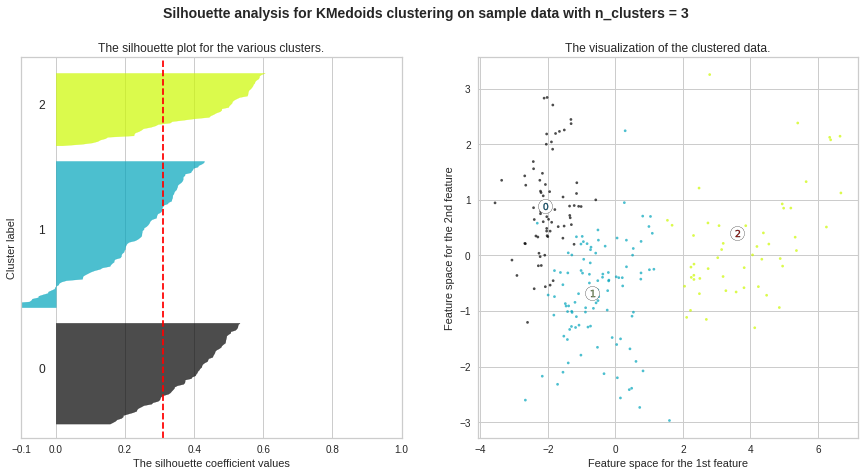

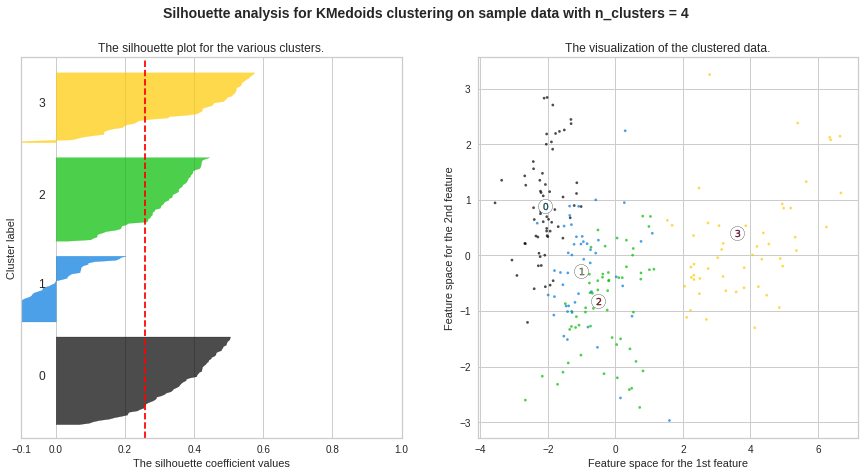

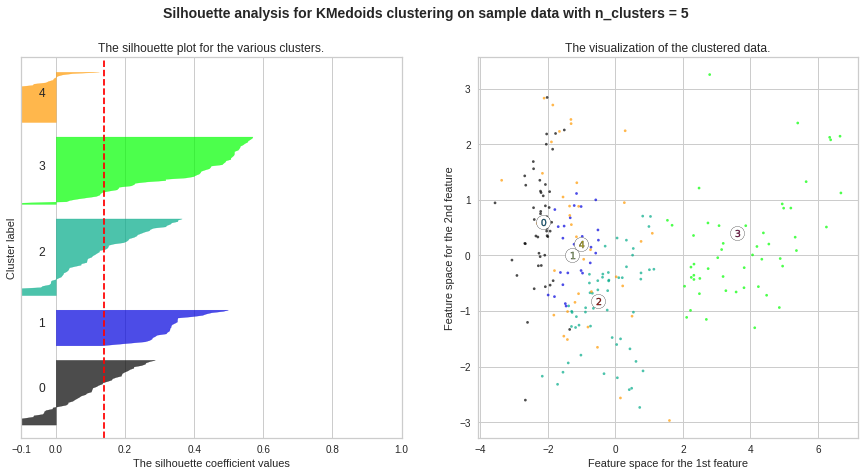

In [48]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(df_model) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility
    clusterer = KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_model)

    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_model, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_model, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_model.iloc[:, 0], df_model.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold');

With the help of the silhouette analysis, we can identify the optimal number of clusters by taking the number of clusters that maximises the silhouette coefficient. In this case, we can see that the silhouette score for 3 clusters is the highest at 0.31.

The silhouette plots also allow us to visualise cluster size as well as the clusterability of data points. Values close to -1 correspond to bad clustering results while values closer to 1 correspond to dense, well-defined clusters. Therefore, the higher the silhouette value is, the better the results from clustering.

Often ‘build’ is more efficient but slower than other initializations on big datasets and it is also very non-robust, if there are outliers in the dataset, use another initialization. Here, we will use the 'k-medoids++' initialization method.

Now we can create our model. We will use the 'k-medoids++' initialization in this instance. This is because the default initialization method, 'build', is very non-robust if there are outliers in the dataset.

In [49]:
# KMedoids object with 3 clusters
kmed3 = KMedoids(n_clusters=3, random_state=42, init='k-medoids++')

In [50]:
# Fit model to data
kmed3.fit(df_model)

KMedoids(init='k-medoids++', n_clusters=3, random_state=42)

In [51]:
# Show cluster labels
kmed3.labels_

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0,
       2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1])

In [52]:
# Add cluster groups to original dataframe
df_clusters = data_final.copy()
df_clusters['cluster_group'] = kmed3.labels_
df_clusters.head(5)

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity,cluster_group
0,Afghanistan,Asia,2.38,36.7,12.7,638.0,104.3,52.8,4.82,2000.0,23.90,5.0,5.5,1
1,Albania,Europe,0.28,13.0,7.1,15.0,10.8,79.0,1.53,12500.0,5.83,2.0,21.7,0
2,Algeria,Africa,1.52,20.0,4.4,112.0,17.6,77.5,2.59,15200.0,11.70,5.6,27.4,0
3,American Samoa,Oceania,-1.40,17.8,5.9,62.0,9.9,74.8,2.35,11200.0,29.80,-0.5,46.0,0
4,Andorra,Europe,-0.06,7.0,7.7,6.0,3.5,83.0,1.43,49900.0,3.70,-0.9,25.6,2


In [53]:
# Number of countries in each cluster
df_clusters['cluster_group'].value_counts()

0    117
2     59
1     52
Name: cluster_group, dtype: int64

Let's have a look at the median values for each cluster.

In [54]:
# Median for all features in each cluster
df_clusters.drop(['country', 'region'], axis=1).groupby('cluster_group').median()

,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity
cluster_group,,,,,,,,,,,
0,0.770,15.4,6.30,61.0,11.60,75.3,1.96,13600.0,8.40,3.1,23.40
1,2.385,32.3,7.45,396.5,47.65,64.2,4.18,2500.0,11.50,5.3,8.35
2,0.600,10.6,8.30,6.0,3.60,81.4,1.62,50100.0,3.89,1.5,22.45


From the above table, we can see that cluster 2 has some of the best figures. Countries in this cluster typically have lower maternal mortality rate, lower infant mortality rate, higher life expectancy, lower total fertility rate, higher GDP per capita and lower unemployment. This cluster likely included countries who are **least** in need of aid. 

The figures for cluster 1 appear to be the worst. Countries in this cluster typically have higher maternal mortality rate, higher infant mortality rate, lower life expectancy, higher total fertility rate, lower GDP per capita and higher unemployment. This cluster likely includes countries who are **most** in need of aid. 

cluster 0 contains the most countries and the figures mostly appear to be between cluster 1 and 2. This cluster likely includes countries that are moderately developed.

All of the above information indicates that we should focus on cluster 1 to determine which countries in that cluster are the most in need of aid.

**Cluster 0** = Moderately developed countries  
**Cluster 1** = Poorest, least developed countries  
**Cluster 2** = Richest, most developled countries 

Let's look at a sample of countries from each cluster.

In [55]:
# Look at a sample of countries in cluster 0
df_clusters[df_clusters['cluster_group']==0].sample(5)

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity,cluster_group
143,Nauru,Oceania,0.46,21.9,6.0,62.0,7.4,68.4,2.68,12300.0,23.0,5.1,61.0,0
167,Russia,Asia,-0.16,10.0,13.4,17.0,6.5,71.9,1.60,27900.0,4.6,3.7,23.1,0
158,Papua New Guinea,Oceania,1.60,22.5,6.7,145.0,33.2,67.8,2.84,3700.0,2.5,5.4,21.3,0
187,Solomon Islands,Oceania,1.84,23.6,3.8,104.0,13.4,76.2,2.97,2200.0,8.8,0.5,22.5,0
106,Kazakhstan,Asia,0.89,16.4,8.2,10.0,17.9,72.0,2.16,26300.0,4.8,7.4,21.0,0


In [56]:
# Look at a sample of countries in cluster 1
df_clusters[df_clusters['cluster_group']==1].sample(5)

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity,cluster_group
202,Timor-Leste,Southeast Asia,2.27,32.0,5.7,142.0,31.7,69.3,4.44,6000.0,4.4,0.6,3.8,1
31,Burkina Faso,Africa,2.66,35.1,8.2,320.0,52.0,62.7,4.51,1900.0,77.0,0.4,5.6,1
188,Somalia,Africa,2.21,38.7,12.4,829.0,89.5,54.0,5.51,3300.0,11.5,1.5,8.3,1
125,Malawi,Africa,3.30,40.1,7.2,349.0,39.5,63.2,5.31,1200.0,20.4,12.2,5.8,1
21,Benin,Africa,3.40,42.1,8.4,397.0,58.7,61.4,5.53,2300.0,1.0,0.1,9.6,1


In [57]:
# Look at a sample of countries in cluster 2
df_clusters[df_clusters['cluster_group']==2].sample(5)

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity,cluster_group
19,Belgium,Europe,0.63,11.1,9.8,5.0,3.3,81.4,1.77,46600.0,5.36,2.2,22.1,2
186,Slovenia,Europe,0.01,8.7,10.3,7.0,1.7,81.4,1.59,34500.0,7.64,1.4,20.2,2
71,France,Europe,0.35,11.9,9.6,8.0,3.2,82.2,2.06,44100.0,8.12,1.2,21.6,2
196,Switzerland,Europe,0.66,10.5,8.5,5.0,3.5,82.8,1.57,62100.0,2.31,0.5,19.5,2
98,Ireland,Europe,1.04,13.0,6.8,5.0,3.6,81.2,1.94,73200.0,4.98,0.3,25.3,2


<a id="cluster_analysis"></a>
## 7. Cluster Analysis
---

Here, we will perform a small cluster analysis to visualise the contents of clusters as well as compare the clusters with each other.

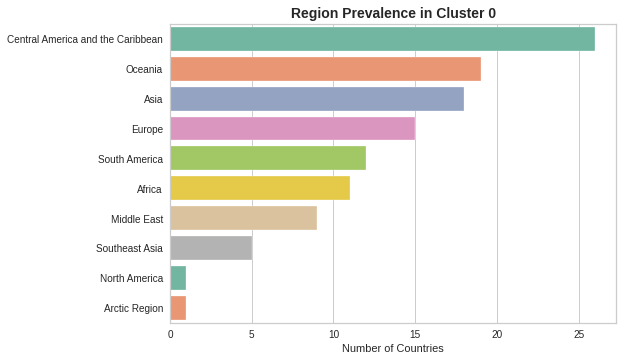

In [58]:
# Region prevalence in cluster 0
df_cluster0 = df_clusters[df_clusters['cluster_group']==0]
cluster0_regions = df_cluster0['region'].value_counts()
sns.barplot(x=cluster0_regions.values, y=cluster0_regions.index, palette='Set2')
plt.title('Region Prevalence in Cluster 0', fontweight='bold', fontsize=14)
plt.xlabel('Number of Countries');

Cluster 0 is the middle cluster and we can see that while it comprises of many different regions, most of the countries in this cluster come from the 'Central America and the Carribbean' region.

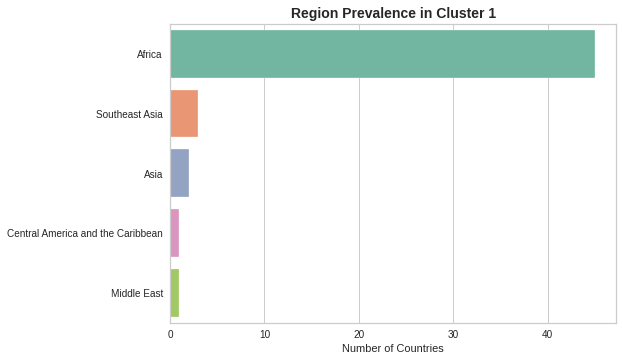

In [59]:
# Region prevalence in cluster 1
df_cluster1 = df_clusters[df_clusters['cluster_group']==1]
cluster1_regions = df_cluster1['region'].value_counts()
sns.barplot(x=cluster1_regions.values, y=cluster1_regions.index, palette='Set2')
plt.title('Region Prevalence in Cluster 1', fontweight='bold', fontsize=14)
plt.xlabel('Number of Countries');

Not surprisingly, we can see that cluster 1 &ndash; the cluster most in need of aid &ndash; contains mostly countries from the African region.

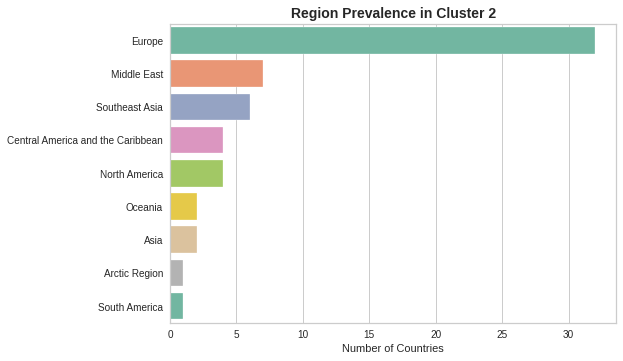

In [60]:
# Region prevalence in cluster 2
df_cluster2 = df_clusters[df_clusters['cluster_group']==2]
cluster2_regions = df_cluster2['region'].value_counts()
sns.barplot(x=cluster2_regions.values, y=cluster2_regions.index, palette='Set2')
plt.title('Region Prevalence in Cluster 2', fontweight='bold', fontsize=14)
plt.xlabel('Number of Countries');

We can also see that cluster 2 mostly contains countries from the European region.

In [61]:
# Create data for cluster comparisons based on median
inf_mor_comp = df_clusters[['infant_mort_rate', 'cluster_group']].groupby('cluster_group').median()
lif_exp_comp = df_clusters[['life_expectancy', 'cluster_group']].groupby('cluster_group').median()
gdp_cap_comp = df_clusters[['gdp_per_capita', 'cluster_group']].groupby('cluster_group').median()
adu_obe_comp = df_clusters[['adult_obesity', 'cluster_group']].groupby('cluster_group').median()

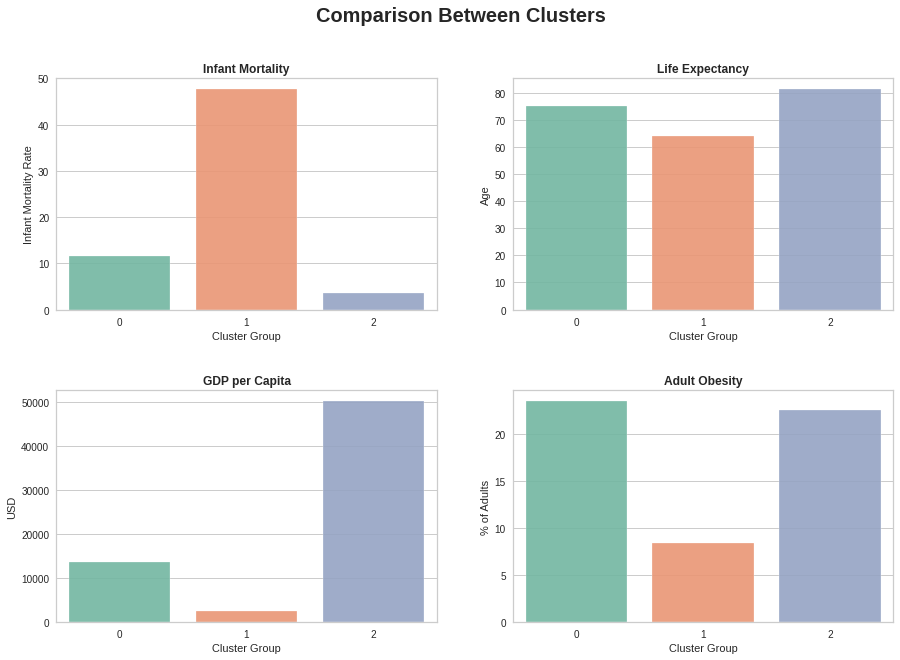

In [62]:
# Plot cluster comparisons
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Comparison Between Clusters', fontweight='bold', fontsize=20)
plt.subplots_adjust(hspace=0.35)

sns.barplot(x=inf_mor_comp.index, y=inf_mor_comp.values.ravel(), alpha=0.9, ax=ax[0,0], palette='Set2')
sns.barplot(x=lif_exp_comp.index, y=lif_exp_comp.values.ravel(), alpha=0.9, ax=ax[0,1], palette='Set2')
sns.barplot(x=gdp_cap_comp.index, y=gdp_cap_comp.values.ravel(), alpha=0.9, ax=ax[1,0], palette='Set2')
sns.barplot(x=adu_obe_comp.index, y=adu_obe_comp.values.ravel(), alpha=0.9, ax=ax[1,1], palette='Set2')

ax[0,0].set_title('Infant Mortality', fontweight='bold')
ax[0,1].set_title('Life Expectancy', fontweight='bold')
ax[1,0].set_title('GDP per Capita', fontweight='bold')
ax[1,1].set_title('Adult Obesity', fontweight='bold')

ax[0,0].set_ylabel('Infant Mortality Rate')
ax[0,1].set_ylabel('Age')
ax[1,0].set_ylabel('USD')
ax[1,1].set_ylabel('% of Adults')

for x in [0,1]:
    for y in [0,1]:
        ax[x,y].set_xlabel('Cluster Group');

Here we can see how all of the clusters compare for infant mortality, life expectancy, GDP per capita and adult obesity. Cluster 1 has the worst figures for all of the above features apart from adult obesity. This is expected as obesity is unlikely in poorer countries and is often described as a disease of affluence.

### Identifying Countries Most in Need of Aid

From the above analysis, we can clearly see that the countries in cluster group 1 require the most aid. However, there are 52 countries in this cluster so we will need to reduce down the countries even further to focus on the countries most in need of aid within the cluster.

To do this, we will select a few of the features which are more important measures of a country's need for aid. We will use:

* `death_rate`
* `maternal_mort_rate`
* `infant_mort_rate`
* `life_expectancy`
* `gdp_per_capita`

In [63]:
# Descriptive statistics for cluster 1
df_cluster1.describe(percentiles=[.5])

,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity,cluster_group
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,2.330577,32.630769,8.103846,458.038462,50.067308,63.013462,4.254231,4190.384615,15.807692,11.005769,9.087500,1.0
std,0.689886,6.465369,2.155882,254.046696,15.559610,4.494966,1.081077,5578.750286,14.647182,26.534952,3.994836,0.0
min,0.160000,21.300000,5.200000,130.000000,28.000000,52.800000,2.190000,700.000000,0.300000,-0.900000,3.800000,1.0
50%,2.385000,32.300000,7.450000,396.500000,47.650000,64.200000,4.180000,2500.000000,11.500000,5.300000,8.350000,1.0
max,3.660000,47.500000,15.400000,1150.000000,104.300000,69.300000,7.000000,37400.000000,77.000000,187.900000,22.700000,1.0


To extract the countries from within the cluster that require aid the most, we will filter out all countries that fall below (for measures where lower is worse) or above (for measures where higher is worse) the medians of our selected features.

In [64]:
# Filter out countries most in need of aid using the features we selected
df_cluster1.loc[
    (df_cluster1['death_rate'] > df_cluster1['death_rate'].median()) & 
    (df_cluster1['maternal_mort_rate'] > df_cluster1['maternal_mort_rate'].median()) & 
    (df_cluster1['infant_mort_rate'] > df_cluster1['infant_mort_rate'].median()) &
    (df_cluster1['life_expectancy'] < df_cluster1['life_expectancy'].median()) &
    (df_cluster1['gdp_per_capita'] < df_cluster1['gdp_per_capita'].median())]

,country,region,pop_growth,birth_rate,death_rate,maternal_mort_rate,infant_mort_rate,life_expectancy,total_fert_rate,gdp_per_capita,unemployment,inflation,adult_obesity,cluster_group
0,Afghanistan,Asia,2.38,36.7,12.7,638.0,104.3,52.8,4.82,2000.0,23.9,5.0,5.5,1
21,Benin,Africa,3.40,42.1,8.4,397.0,58.7,61.4,5.53,2300.0,1.0,0.1,9.6,1
39,Central African Republic,Africa,2.09,33.2,12.3,829.0,80.6,54.2,4.14,700.0,6.9,4.1,7.5,1
40,Chad,Africa,3.18,41.7,10.0,1140.0,68.6,58.3,5.68,2300.0,11.5,-0.9,6.1,1
45,"Congo, Democratic Republic Of The",Africa,3.18,41.0,8.4,473.0,64.5,61.0,5.77,800.0,11.5,41.5,6.7,1
86,Guinea,Africa,2.76,36.1,8.4,576.0,52.4,63.2,4.92,2200.0,2.7,8.9,7.7,1
87,Guinea-Bissau,Africa,2.51,36.9,7.9,667.0,51.9,62.8,4.75,1900.0,11.5,1.1,9.5,1
128,Mali,Africa,2.95,42.2,9.0,562.0,64.0,61.6,5.72,2200.0,7.9,1.8,8.6,1
149,Niger,Africa,3.66,47.5,10.2,509.0,67.7,59.3,7.00,1200.0,0.3,2.4,5.5,1
182,Sierra Leone,Africa,2.43,35.4,9.8,1120.0,63.6,59.8,4.62,1600.0,15.0,18.2,8.7,1


Based on our clustering and filtering, these 11 countries appear to be the most in need of aid.

<a id="conclusion"></a>
## 8. Conclusion
---

This analysis was conducted to identify which countries, based on data from the most recent CIA World Factbook, required aid the most.

From the EDA phase of the analysis, we saw that countries from the African region were particularly worse off than other countries for almost all of the socioeconomic measures.

Before clustering, we scaled our features and performed PCA to reduce the dimensionality of the data. We also checked for the clusterability of our data by using the Hopkins Statistic.

Due to the outliers in the data, we opted to use K-Medoids clustering rather than K-Means due to the fact that K-Medoids is more robust to outliers.

To identify the optimum number of clusters, we used the elbow method as well as a silhouette analysis. Both methods clearly indicated that 3 clusters were optimum.

Once we had partitioned our data into 3 clusters, we analysed each cluster to determine what type of countries they contained. We found that cluster 0 contained moderately developed countries, cluster 1 contained the least developed countries and cluster 2 contained the most developed countries.

We then performed a small cluster analysis to examine the regions in each cluster and compare clusters with each other. 

Finally, to identiy the countries most in need of aid, we took all of the countries in cluster 1 and filtered out those countries that fell either below (for measures where lower was worse) or above (for measures where higher was worse) the feature medians. 

To conclude, out of the 228 countries that we analysed, we were able to identify 11 countries which had some of the worse figures for a multitude of socieconomic measures. Going forward, these 11 countries should be prioritised when devloping strategies to reduce global inequality and increase the standard of living for people around the world.

| Countries Most in Need of Aid |
| :- |
| Afghanistan |
| Benin |
| Central African Republic |
| Chad |
| The Democratic Republic of Congo |
| Guinea |
| Guinea-Bissau |
| Mali |
| Niger |
| Sierra Leone |
| South Sudan |

<a id="future_recommendations"></a>
## 9. Future Recommendations
---

While we were able to identify 11 countries that require the most aid, we did have to eliminate some countries, mostly small island nations, due to insufficient data. In the future, it may be advantageous to collect more data from these nations so we can accurately assess their needs compared to other countries. 

We could also combine data from the World Factbook with other data sources such as the Human Freedom Index or the World Happiness Report to better understand the quality of life of people from different countries. This may open up fruitful research avenues that could shed light on different priorities and strategies focused on increasing people's quality of life around the world.

**[Back to Top](#top)**

In [ ]:
#############################################  TESTING  #######################################################

In [ ]:
## Testing
data20.loc[
    (data20['death_rate'] > data20['death_rate'].quantile(.75)) &
    (data20['maternal_mort_rate'] > data20['maternal_mort_rate'].quantile(.75)) &
    (data20['infant_mort_rate'] > data20['infant_mort_rate'].quantile(.75)) &
    (data20['life_expectancy'] < data20['life_expectancy'].quantile(.25)) &
    (data20['gdp_per_capita'] < data20['gdp_per_capita'].quantile(.25))]

In [ ]:
data20[data20['death_rate'] > data20['death_rate'].quantile(.5)]

In [ ]:
data20['gdp_per_capita'].quantile(.25)